### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Importing .csv file

In [2]:
df_chiller01 = pd.read_csv('data/chiller01.csv', sep=';', index_col=0)
df_chiller03 = pd.read_csv('data/chiller03.csv', sep=';', index_col=0)

### Creating the model

Using the best approach found previously during the Data Exploration phase.
Linear regression of multiple variables.

In [3]:
df_chiller01['carga_termica_^2'] = df_chiller01['carga_termica_TR']**2
df_chiller03['carga_termica_^2'] = df_chiller03['carga_termica_TR']**2

features = ['carga_termica_TR', 'carga_termica_^2', 'temp_ambiente_C', 'umid_rel_%',
            'temp_saida_C','temp_entrada_C', 'ur_delta_temp_C', 'vazao_saida_m3h','temp_entrada_cond_C']

X1 = df_chiller01.loc[:, features].values
X3 = df_chiller03.loc[:, features].values

y1 = df_chiller01.loc[:, ['rendimento']].values
y3 = df_chiller03.loc[:, ['rendimento']].values

model1 = LinearRegression()
model3 = LinearRegression()

model1.fit(X1, y1)
model3.fit(X3, y3)

df_chiller01['rend_pred'] = model1.predict(X1)
df_chiller03['rend_pred'] = model3.predict(X3)

r2_ch1 = model1.score(X1, y1)
r2_ch3 = model3.score(X3, y3)
rmse_ch1 = np.sqrt(mean_squared_error(df_chiller01['rendimento'], df_chiller01['rend_pred']))
rmse_ch3 = np.sqrt(mean_squared_error(df_chiller03['rendimento'], df_chiller03['rend_pred']))
cvrmse_ch1 = rmse_ch1/df_chiller01['rendimento'].mean()
cvrmse_ch3 = rmse_ch3/df_chiller03['rendimento'].mean()

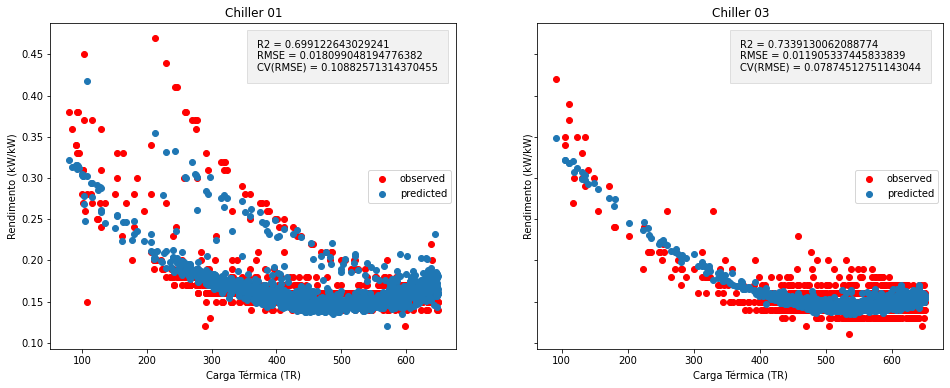

In [4]:
text1 = f"""R2 = {r2_ch1}
RMSE = {rmse_ch1}
CV(RMSE) = {cvrmse_ch1}"""

text3 = f"""R2 = {r2_ch3}
RMSE = {rmse_ch3}
CV(RMSE) = {cvrmse_ch3}"""

fig, axes = plt.subplots(1, 2, figsize = (16,6), sharey=True)


axes[0].scatter(df_chiller01['carga_termica_TR'], df_chiller01['rendimento'], color='red', label='observed')
axes[0].scatter(df_chiller01['carga_termica_TR'], df_chiller01['rend_pred'], label='predicted')

axes[0].set_xlabel('Carga Térmica (TR)')
axes[0].set_ylabel('Rendimento (kW/kW)')
axes[0].set_title('Chiller 01')
axes[0].text(370, .43, text1,
        bbox={'facecolor': 'gray', 'pad': 10, 'alpha':0.1})
axes[0].legend(loc = 'center right');

axes[1].scatter(df_chiller03['carga_termica_TR'], df_chiller03['rendimento'], color='red', label='observed')
axes[1].scatter(df_chiller03['carga_termica_TR'], df_chiller03['rend_pred'], label='predicted')

axes[1].set_xlabel('Carga Térmica (TR)')
axes[1].set_ylabel('Rendimento (kW/kW)')
axes[1].set_title('Chiller 03')
axes[1].text(370, .43, text3,
        bbox={'facecolor': 'gray', 'pad': 10, 'alpha':0.1})
axes[1].legend(loc = 'center right');

### Applying the model for standardized conditions

Calculating the efficiency fixing the conditions for all the features, except the thermal load (Carga térmica). The conditions to be used will be the registered mean for each chiller.

In [5]:
ct = np.array((range(0, 6565, 65)))/10
sq_ct = ct**2

dict_ch1 = {'carga_termica_TR':ct,
            'carga_termica_^2':sq_ct,
            'temp_ambiente_C':df_chiller01['temp_ambiente_C'].mean(),
            'umid_rel_%':df_chiller01['umid_rel_%'].mean(),
            'temp_saida_C':df_chiller01['temp_saida_C'].mean(),
            'temp_entrada_C':df_chiller01['temp_entrada_C'].mean(),
            'ur_delta_temp_C':df_chiller01['ur_delta_temp_C'].mean(),
            'vazao_saida_m3h':df_chiller01['vazao_saida_m3h'].mean(),
            'temp_entrada_cond_C':df_chiller01['temp_entrada_cond_C'].mean()}

dict_ch3 = {'carga_termica_TR':ct,
            'carga_termica_^2':sq_ct,
            'temp_ambiente_C':df_chiller03['temp_ambiente_C'].mean(),
            'umid_rel_%':df_chiller03['umid_rel_%'].mean(),
            'temp_saida_C':df_chiller03['temp_saida_C'].mean(),
            'temp_entrada_C':df_chiller03['temp_entrada_C'].mean(),
            'ur_delta_temp_C':df_chiller03['ur_delta_temp_C'].mean(),
            'vazao_saida_m3h':df_chiller03['vazao_saida_m3h'].mean(),
            'temp_entrada_cond_C':df_chiller03['temp_entrada_cond_C'].mean()}

df_ch1 = pd.DataFrame(dict_ch1)
df_ch3 = pd.DataFrame(dict_ch3)

In [6]:
X1_test = df_ch1.loc[:, features].values
X3_test = df_ch3.loc[:, features].values

df_ch1['rend_pred'] = model1.predict(X1_test)
df_ch3['rend_pred'] = model3.predict(X3_test)

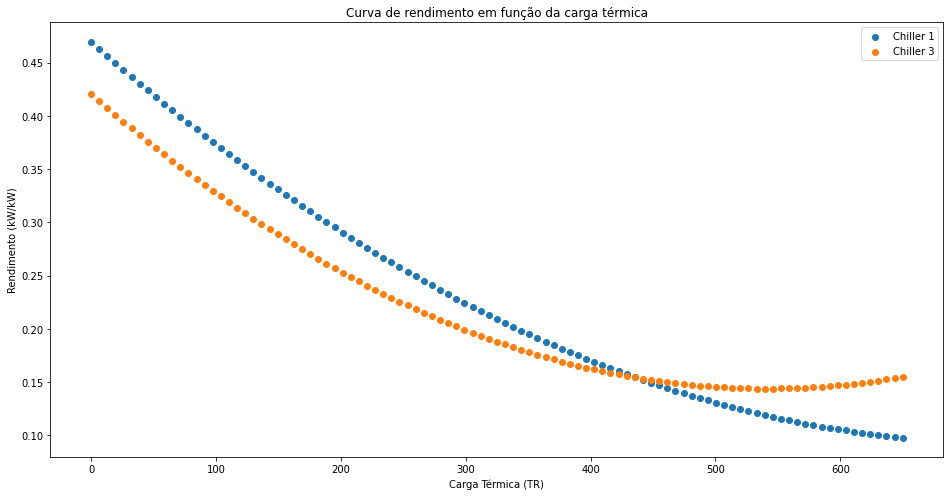

In [7]:
fig, axes = plt.subplots(1, 1, figsize = (16,8), sharey=True)



plt.scatter(df_ch1['carga_termica_TR'], df_ch1['rend_pred'], label='Chiller 1')
plt.scatter(df_ch3['carga_termica_TR'], df_ch3['rend_pred'], label='Chiller 3')

plt.xlabel('Carga Térmica (TR)')
plt.ylabel('Rendimento (kW/kW)')
plt.title('Curva de rendimento em função da carga térmica')
plt.legend(loc = 'upper right');

In [8]:
df_ch1['pot_kW'] = df_ch1.loc[:,'rend_pred']*df_ch1.loc[:,'carga_termica_TR']*3.517
df_ch3['pot_kW'] = df_ch3.loc[:,'rend_pred']*df_ch3.loc[:,'carga_termica_TR']*3.517

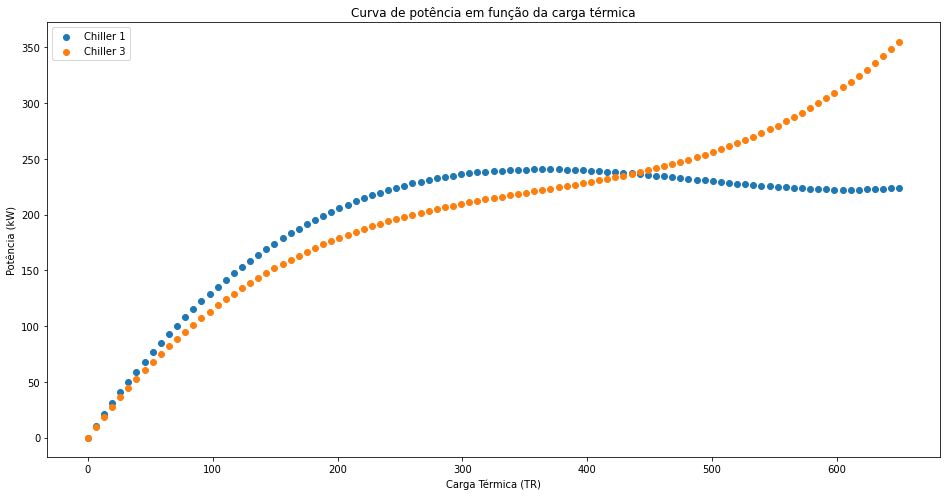

In [9]:
fig, axes = plt.subplots(1, 1, figsize = (16,8), sharey=True)



plt.scatter(df_ch1['carga_termica_TR'], df_ch1['pot_kW'], label='Chiller 1')
plt.scatter(df_ch3['carga_termica_TR'], df_ch3['pot_kW'], label='Chiller 3')

plt.xlabel('Carga Térmica (TR)')
plt.ylabel('Potência (kW)')
plt.title('Curva de potência em função da carga térmica')
plt.legend(loc = 'upper left');

### Checking the influence of condensation water temperature

In [10]:
df_chiller01['temp_entrada_cond_C'].mean(), df_chiller03['temp_entrada_cond_C'].mean()

(26.19387966804979, 25.98036272670419)

In [11]:
dict_list_cond = [{'carga_termica_TR':ct,
            'carga_termica_^2':sq_ct,
            'temp_ambiente_C':25,
            'umid_rel_%':63,
            'temp_saida_C':7.5,
            'temp_entrada_C':13,
            'ur_delta_temp_C':5.5,
            'vazao_saida_m3h':350,
            'temp_entrada_cond_C':i} for i in range(23, 27)]

In [12]:
df_cond_list = [pd.DataFrame(x) for x in dict_list_cond]

X_cond_list = [x.loc[:, features].values for x in df_cond_list]

for i in range(len(df_cond_list)):
    df_cond_list[i]['rend_pred_ch1'] = model1.predict(X_cond_list[i])
    df_cond_list[i]['rend_pred_ch3'] = model3.predict(X_cond_list[i])

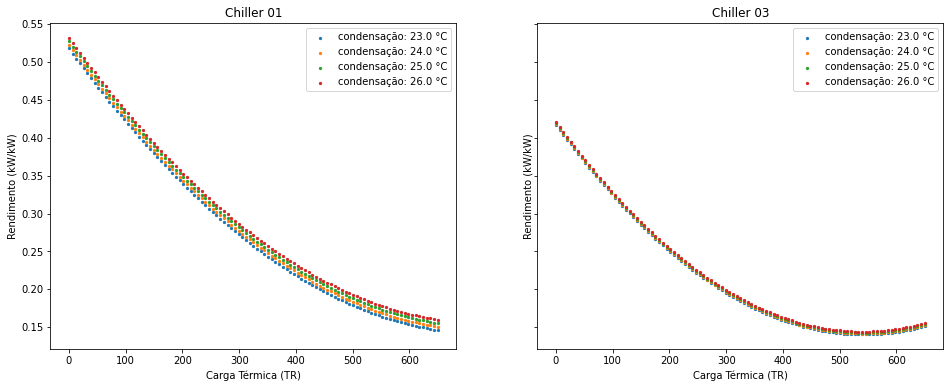

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (16,6), sharey=True)

for i in range(0,len(df_cond_list)):
    axes[0].scatter(df_cond_list[i]['carga_termica_TR'], df_cond_list[i]['rend_pred_ch1'],\
                    label=f'condensação: {df_cond_list[i].temp_entrada_cond_C.mean()} °C', s=5)
    axes[1].scatter(df_cond_list[i]['carga_termica_TR'], df_cond_list[i]['rend_pred_ch3'],\
                    label=f'condensação: {df_cond_list[i].temp_entrada_cond_C.mean()} °C', s=5)


axes[0].set_xlabel('Carga Térmica (TR)')
axes[0].set_ylabel('Rendimento (kW/kW)')
axes[0].set_title('Chiller 01')
axes[0].legend();

axes[1].set_xlabel('Carga Térmica (TR)')
axes[1].set_ylabel('Rendimento (kW/kW)')
axes[1].set_title('Chiller 03')
axes[1].legend();

In [14]:
for i in range(0,len(df_cond_list)):
    df_cond_list[i]['pot_ch1'] = df_cond_list[i].loc[:,'rend_pred_ch1']*df_cond_list[i].loc[:,'carga_termica_TR']*3.517
    df_cond_list[i]['pot_ch3'] = df_cond_list[i].loc[:,'rend_pred_ch3']*df_cond_list[i].loc[:,'carga_termica_TR']*3.517

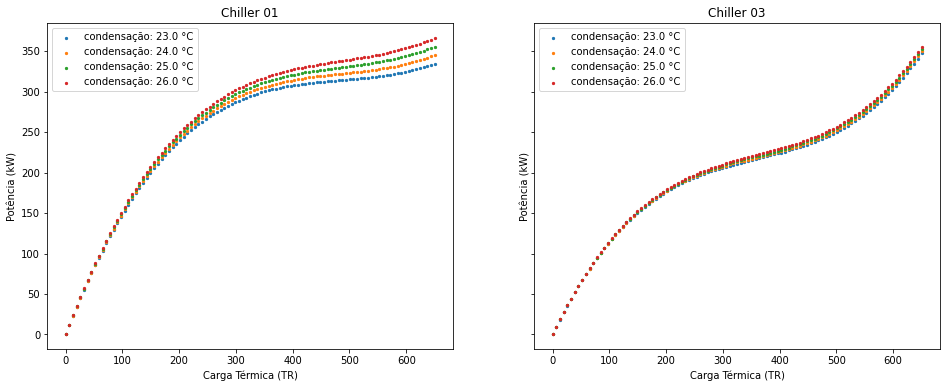

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (16,6), sharey=True)

for i in range(0,len(df_cond_list)):
    axes[0].scatter(df_cond_list[i]['carga_termica_TR'], df_cond_list[i]['pot_ch1'],\
                    label=f'condensação: {df_cond_list[i].temp_entrada_cond_C.mean()} °C', s=5)
    axes[1].scatter(df_cond_list[i]['carga_termica_TR'], df_cond_list[i]['pot_ch3'],\
                    label=f'condensação: {df_cond_list[i].temp_entrada_cond_C.mean()} °C', s=5)


axes[0].set_xlabel('Carga Térmica (TR)')
axes[0].set_ylabel('Potência (kW)')
axes[0].set_title('Chiller 01')
axes[0].legend();

axes[1].set_xlabel('Carga Térmica (TR)')
axes[1].set_ylabel('Potência (kW)')
axes[1].set_title('Chiller 03')
axes[1].legend();

### Checking the influence of leaving water temperature (setpoint)

In [16]:
dict_list_sp = [{'carga_termica_TR':ct,
            'carga_termica_^2':sq_ct,
            'temp_ambiente_C':25,
            'umid_rel_%':63,
            'temp_saida_C':i+0.5,
            'temp_entrada_C':13,
            'ur_delta_temp_C':13-i+0.5,
            'vazao_saida_m3h':350,
            'temp_entrada_cond_C':26} for i in range(5, 10)]

In [17]:
df_sp_list = [pd.DataFrame(x) for x in dict_list_sp]

X_sp_list = [x.loc[:, features].values for x in df_sp_list]

for i in range(len(df_sp_list)):
    df_sp_list[i]['rend_pred_ch1'] = model1.predict(X_sp_list[i])
    df_sp_list[i]['rend_pred_ch3'] = model3.predict(X_sp_list[i])

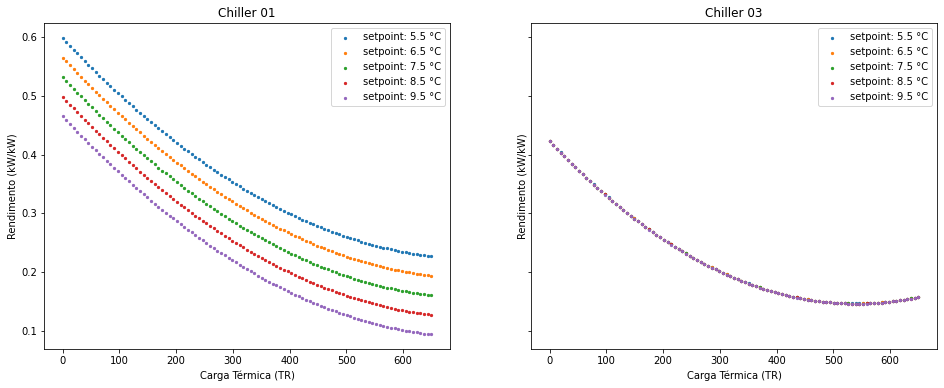

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (16,6), sharey=True)

for i in range(0,len(df_sp_list)):
    axes[0].scatter(df_sp_list[i]['carga_termica_TR'], df_sp_list[i]['rend_pred_ch1'],\
                    label=f'setpoint: {df_sp_list[i].temp_saida_C.mean()} °C', s=5)
    axes[1].scatter(df_sp_list[i]['carga_termica_TR'], df_sp_list[i]['rend_pred_ch3'],\
                    label=f'setpoint: {df_sp_list[i].temp_saida_C.mean()} °C', s=5)


axes[0].set_xlabel('Carga Térmica (TR)')
axes[0].set_ylabel('Rendimento (kW/kW)')
axes[0].set_title('Chiller 01')
axes[0].legend();

axes[1].set_xlabel('Carga Térmica (TR)')
axes[1].set_ylabel('Rendimento (kW/kW)')
axes[1].set_title('Chiller 03')
axes[1].legend();

In [19]:
for i in range(0,len(df_sp_list)):
    df_sp_list[i]['pot_ch1'] = df_sp_list[i].loc[:,'rend_pred_ch1']*df_sp_list[i].loc[:,'carga_termica_TR']*3.517
    df_sp_list[i]['pot_ch3'] = df_sp_list[i].loc[:,'rend_pred_ch3']*df_sp_list[i].loc[:,'carga_termica_TR']*3.517

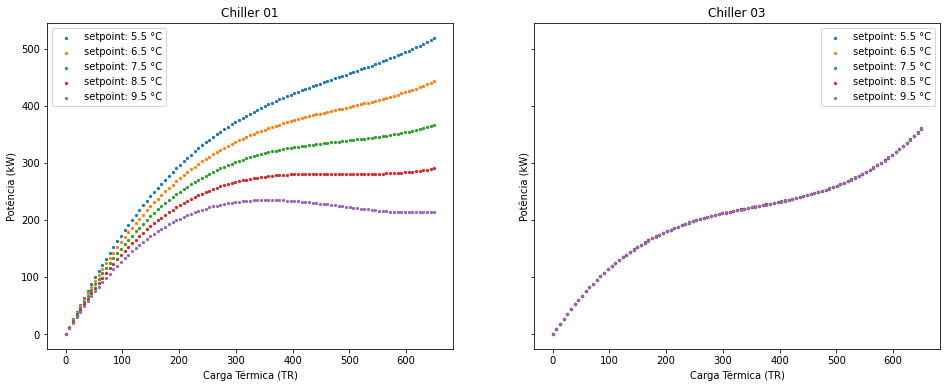

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (16,6), sharey=True)

for i in range(0,len(df_sp_list)):
    axes[0].scatter(df_sp_list[i]['carga_termica_TR'], df_sp_list[i]['pot_ch1'],\
                    label=f'setpoint: {df_sp_list[i].temp_saida_C.mean()} °C', s=5)
    axes[1].scatter(df_sp_list[i]['carga_termica_TR'], df_sp_list[i]['pot_ch3'],\
                    label=f'setpoint: {df_sp_list[i].temp_saida_C.mean()} °C', s=5)


axes[0].set_xlabel('Carga Térmica (TR)')
axes[0].set_ylabel('Potência (kW)')
axes[0].set_title('Chiller 01')
axes[0].legend();

axes[1].set_xlabel('Carga Térmica (TR)')
axes[1].set_ylabel('Potência (kW)')
axes[1].set_title('Chiller 03')

axes[1].legend();

### Creating the .csv to input in the Genetic Algorithm

In [21]:
ct = np.array((range(0, 7150, 650)))/10
sq_ct = ct**2

dict_ch1 = {'carga_termica_TR':ct,
            'carga_termica_^2':sq_ct,
            'temp_ambiente_C':df_chiller01['temp_ambiente_C'].mean(),
            'umid_rel_%':df_chiller01['umid_rel_%'].mean(),
            'temp_saida_C':df_chiller01['temp_saida_C'].mean(),
            'temp_entrada_C':df_chiller01['temp_entrada_C'].mean(),
            'ur_delta_temp_C':df_chiller01['ur_delta_temp_C'].mean(),
            'vazao_saida_m3h':df_chiller01['vazao_saida_m3h'].mean(),
            'temp_entrada_cond_C':df_chiller01['temp_entrada_cond_C'].mean()}

dict_ch3 = {'carga_termica_TR':ct,
            'carga_termica_^2':sq_ct,
            'temp_ambiente_C':df_chiller03['temp_ambiente_C'].mean(),
            'umid_rel_%':df_chiller03['umid_rel_%'].mean(),
            'temp_saida_C':df_chiller03['temp_saida_C'].mean(),
            'temp_entrada_C':df_chiller03['temp_entrada_C'].mean(),
            'ur_delta_temp_C':df_chiller03['ur_delta_temp_C'].mean(),
            'vazao_saida_m3h':df_chiller03['vazao_saida_m3h'].mean(),
            'temp_entrada_cond_C':df_chiller03['temp_entrada_cond_C'].mean()}


dict_std = {'carga_termica_TR':ct,
            'carga_termica_^2':sq_ct,
            'temp_ambiente_C':25,
            'umid_rel_%':63,
            'temp_saida_C':7.5,
            'temp_entrada_C':13,
            'ur_delta_temp_C':5.5,
            'vazao_saida_m3h':350,
            'temp_entrada_cond_C':25}

df_ch1 = pd.DataFrame(dict_std)
df_ch3 = pd.DataFrame(dict_std)

X1_test = df_ch1.loc[:, features].values
X3_test = df_ch3.loc[:, features].values

df_ch1['rend_pred'] = model1.predict(X1_test)
df_ch3['rend_pred'] = model3.predict(X3_test)

df_ch1['pot_kW'] = df_ch1.loc[:,'rend_pred']*df_ch1.loc[:,'carga_termica_TR']*3.517
df_ch3['pot_kW'] = df_ch3.loc[:,'rend_pred']*df_ch3.loc[:,'carga_termica_TR']*3.517

df_ch1['carregamento'] = df_ch1.loc[:,'carga_termica_TR']*100/650
df_ch3['carregamento'] = df_ch3.loc[:,'carga_termica_TR']*100/650

In [22]:
df_ch1_GAinput = df_ch1.loc[:, ['carregamento', 'pot_kW', 'carga_termica_TR']].set_index('carregamento', drop=True, append=False, inplace=False)
df_ch1_GAinput.to_csv('data/df_ch1_GAinput.csv', sep=';')

df_ch3_GAinput = df_ch3.loc[:, ['carregamento', 'pot_kW', 'carga_termica_TR']].set_index('carregamento', drop=True, append=False, inplace=False)
df_ch3_GAinput.to_csv('data/df_ch3_GAinput.csv', sep=';')

In [23]:
df_ch1.loc[:, ['carregamento', 'pot_kW', 'carga_termica_TR']]

,carregamento,pot_kW,carga_termica_TR
0,0.0,0.000000,0.0
1,10.0,105.807550,65.0
2,20.0,185.121081,130.0
3,30.0,242.022446,195.0
4,40.0,280.593501,260.0
5,50.0,304.916097,325.0
6,60.0,319.072089,390.0
7,70.0,327.143330,455.0
8,80.0,333.211675,520.0
9,90.0,341.358976,585.0


In [24]:
df_ch3.loc[:, ['carregamento', 'pot_kW', 'carga_termica_TR']]

,carregamento,pot_kW,carga_termica_TR
0,0.0,0.000000,0.0
1,10.0,81.630216,65.0
2,20.0,138.355899,130.0
3,30.0,175.652904,195.0
4,40.0,198.997085,260.0
5,50.0,213.864297,325.0
6,60.0,225.730395,390.0
7,70.0,240.071233,455.0
8,80.0,262.362666,520.0
9,90.0,298.080549,585.0


In [33]:
np.arange(195, 1365, 70)

array([ 195,  265,  335,  405,  475,  545,  615,  685,  755,  825,  895,
        965, 1035, 1105, 1175, 1245, 1315])

In [74]:
results = pd.read_csv('data/ResultadosGA.csv')
results = results.loc[results['Consumo KW'] < 99999]
results.sort_values(by='Carga TR')
results.reset_index(inplace=True, drop=True)
results

,Combinação,Consumo KW,Carga TR,População,Mutação,Tentativas Máx.,Iterações Máx.,Random state,Usuário,Data
0,[0 4],198.997085,260,2000,0.00,50,500,0,natalia.ceoldo,07/12/2021 - 20:51
1,[0 5],213.864297,325,2000,0.05,50,500,0,natalia.ceoldo,07/12/2021 - 20:53
2,[0 6],225.730395,390,2000,0.05,50,500,0,natalia.ceoldo,07/12/2021 - 20:54
3,[0 7],240.071233,455,2000,0.05,50,500,0,natalia.ceoldo,07/12/2021 - 20:55
4,[0 8],262.362666,520,2000,0.05,50,500,0,natalia.ceoldo,07/12/2021 - 20:58
5,[0 9],298.080549,585,2000,0.05,50,500,0,natalia.ceoldo,07/12/2021 - 21:00
6,[ 0 10],352.700736,650,2000,0.05,50,500,0,natalia.ceoldo,07/12/2021 - 21:01
7,[10 1],437.297304,715,2000,0.05,50,500,0,natalia.ceoldo,07/12/2021 - 21:21
8,[10 2],494.022987,780,2000,0.05,50,500,0,natalia.ceoldo,07/12/2021 - 21:22
9,[10 3],531.319992,845,2000,0.05,50,500,0,natalia.ceoldo,07/12/2021 - 21:24


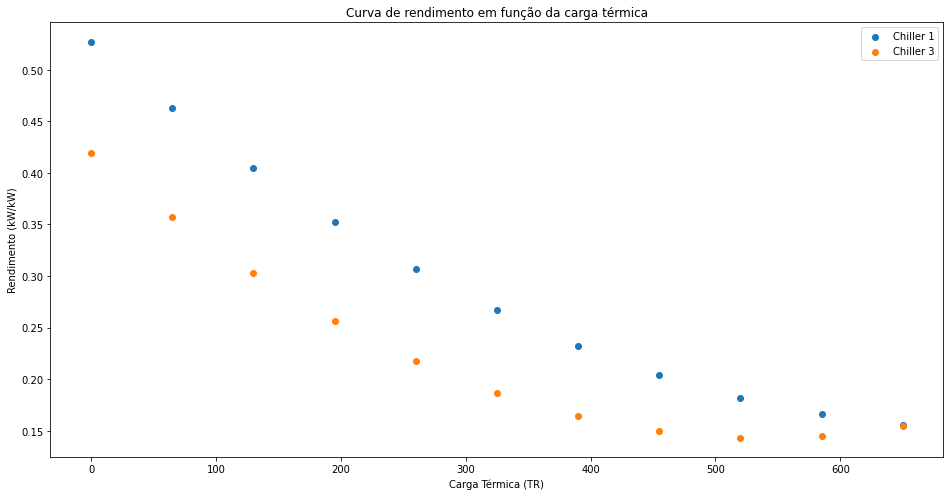

In [75]:
fig, axes = plt.subplots(1, 1, figsize = (16,8), sharey=True)



plt.scatter(df_ch1['carga_termica_TR'], df_ch1['rend_pred'], label='Chiller 1')
plt.scatter(df_ch3['carga_termica_TR'], df_ch3['rend_pred'], label='Chiller 3')

plt.xlabel('Carga Térmica (TR)')
plt.ylabel('Rendimento (kW/kW)')
plt.title('Curva de rendimento em função da carga térmica')
plt.legend(loc = 'upper right');

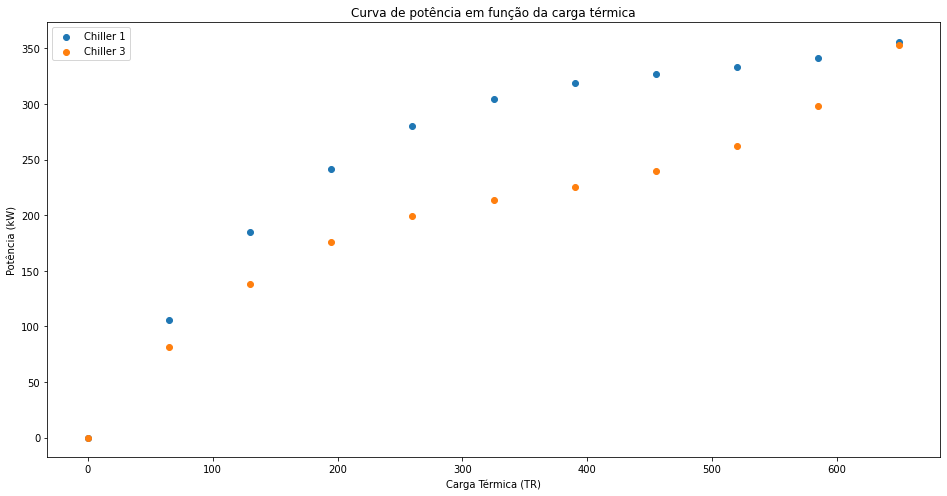

In [76]:
fig, axes = plt.subplots(1, 1, figsize = (16,8), sharey=True)



plt.scatter(df_ch1['carga_termica_TR'], df_ch1['pot_kW'], label='Chiller 1')
plt.scatter(df_ch3['carga_termica_TR'], df_ch3['pot_kW'], label='Chiller 3')

plt.xlabel('Carga Térmica (TR)')
plt.ylabel('Potência (kW)')
plt.title('Curva de potência em função da carga térmica')
plt.legend(loc = 'upper left');